<a href="https://colab.research.google.com/github/JeffersonBP/Aula6Analise-de-sentimentos/blob/main/ANALIZE_DE_CHAMADOS_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARREGA AS PLANILHAS A SEREM COMPARADAS


In [29]:
# Montar o Google Drive para acessar os arquivos
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Carregar as planilhas
#adicionar a planilha mais antiga.
planilha1 = pd.read_excel('/content/drive/My Drive/worck/EQS ENGENHARIA/LOG CAIXA/Atendimento logística20240402.xlsx')
#Adicionar a planilha mais atual
planilha2 = pd.read_excel('/content/drive/My Drive/worck/EQS ENGENHARIA/LOG CAIXA/Atendimento logística20240403.xlsx')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


VERIFICA QUANTOS NOVOS CHAMADOS FORAM ABERTOS

In [30]:
# Obter a lista de chamados da primeira planilha
chamados_planilha1 = set(planilha1['#'])

# Obter a lista de chamados da segunda planilha
chamados_planilha2 = set(planilha2['#'])

# Determinar os novos chamados na segunda planilha
novos_chamados = chamados_planilha2 - chamados_planilha1

# Exibir a quantidade de novos chamados
print("Quantidade de novos chamados na segunda planilha:", len(novos_chamados))


Quantidade de novos chamados na segunda planilha: 13


In [3]:
#MOSTRA QUAIS OS NOVOS CHAMADOS FORAM ABERTOS

In [31]:
# Determinar os novos chamados na segunda planilha
novos_chamados = chamados_planilha2 - chamados_planilha1

# Exibir os novos chamados
print("Novos chamados na segunda planilha:")
for chamado in novos_chamados:
    print(chamado)

Novos chamados na segunda planilha:
2950851
2950822
2950986
2950988
2951052
2951630
2951055
2951407
2950993
2951059
2951060
2950842
2951066


VERIFICA QUAIS CHAMADOS MUDARAM DE SATUS

In [32]:
import pandas as pd

# Criar um dicionário para mapear os status dos chamados na primeira planilha
status_planilha1 = dict(zip(planilha1['#'], planilha1['Status']))

# Listas para armazenar informações
chamados = []
status_anterior = []
status_atual = []
novos_chamados = []

# Iterar sobre os chamados da segunda planilha e comparar com a primeira
for chamado, status in zip(planilha2['#'], planilha2['Status']):
    if chamado in status_planilha1:
        if status != status_planilha1[chamado]:
            chamados.append(chamado)
            status_anterior.append(status_planilha1[chamado])
            status_atual.append(status)
        del status_planilha1[chamado]
    else:
        novos_chamados.append((chamado, status))

# Adicionar chamados restantes (que não estão na segunda planilha) ao DataFrame
for chamado, status in status_planilha1.items():
    chamados.append(chamado)
    status_anterior.append(status)
    status_atual.append(None)

# Criar DataFrame com as informações coletadas
df = pd.DataFrame({
    'Chamado': chamados,
    'Status Anterior': status_anterior,
    'Status Atual': status_atual
})

# Imprimir DataFrame
print("Chamados com mudança de status:")
display(df)

if novos_chamados:
    print("\nNovos chamados na segunda planilha:")
    for chamado, status in novos_chamados:
        print(f"O Chamado de número {chamado} é novo na segunda planilha com o status {status}")



Chamados com mudança de status:


,Chamado,Status Anterior,Status Atual
0,2884848,Em atendimento,Executado
1,2888230,Executado,Finalizado
2,2918042,Executado,Finalizado
3,2920816,Em atendimento,Executado
4,2920831,Aberto,Executado
5,2922275,Aberto,Orçamento Enviado
6,2922290,Aberto,Executado
7,2924506,Aberto,Executado
8,2929100,Executado,Finalizado
9,2929613,Executado,Finalizado



Novos chamados na segunda planilha:
O Chamado de número 2950822 é novo na segunda planilha com o status Aberto
O Chamado de número 2950842 é novo na segunda planilha com o status Aberto
O Chamado de número 2950851 é novo na segunda planilha com o status Aberto
O Chamado de número 2950986 é novo na segunda planilha com o status Aberto
O Chamado de número 2950988 é novo na segunda planilha com o status Aberto
O Chamado de número 2950993 é novo na segunda planilha com o status Aberto
O Chamado de número 2951052 é novo na segunda planilha com o status Orçamento Enviado
O Chamado de número 2951055 é novo na segunda planilha com o status Aberto
O Chamado de número 2951059 é novo na segunda planilha com o status Orçamento Enviado
O Chamado de número 2951060 é novo na segunda planilha com o status Orçamento Enviado
O Chamado de número 2951066 é novo na segunda planilha com o status Orçamento Enviado
O Chamado de número 2951407 é novo na segunda planilha com o status Aberto
O Chamado de número

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def calcular_transicoes(planilha1, planilha2):
    transicoes = {
        'Aberto para Executado/Finalizado': 0,
        'Em Atendimento para Executado/Finalizado': 0,
        'Cancelados': 0
    }

    # Mapear status da planilha1
    status_planilha1 = dict(zip(planilha1['#'], planilha1['Status']))

    # Iterar sobre os chamados da segunda planilha e comparar com a primeira
    for chamado, status in zip(planilha2['#'], planilha2['Status']):
        if chamado in status_planilha1:
            status_anterior = status_planilha1[chamado]
            if status_anterior == "Aberto" and (status == "Executado" or status == "Finalizado"):
                transicoes['Aberto para Executado/Finalizado'] += 1
            elif status_anterior == " Em atendimento" and (status == "Executado" or status == "Finalizado"):
                transicoes['Em Atendimento para Executado/Finalizado'] += 1
            elif status == "Cancelado":
                transicoes['Cancelados'] += 1

    return transicoes

# Calcular as transições
quantidades_transicoes = calcular_transicoes(planilha1, planilha2)

# Criar um DataFrame com as quantidades de transições
df_transicoes = pd.DataFrame.from_dict(quantidades_transicoes, orient='index', columns=['Quantidade'])

print("Quantidades de chamados que passaram de diferentes estados para outros:")
print(df_transicoes)
plt.show()
df_transicoes

Quantidades de chamados que passaram de diferentes estados para outros:
                                          Quantidade
Aberto para Executado/Finalizado                  13
Em Atendimento para Executado/Finalizado           0
Cancelados                                       117


,Quantidade
Aberto para Executado/Finalizado,13
Em Atendimento para Executado/Finalizado,0
Cancelados,117


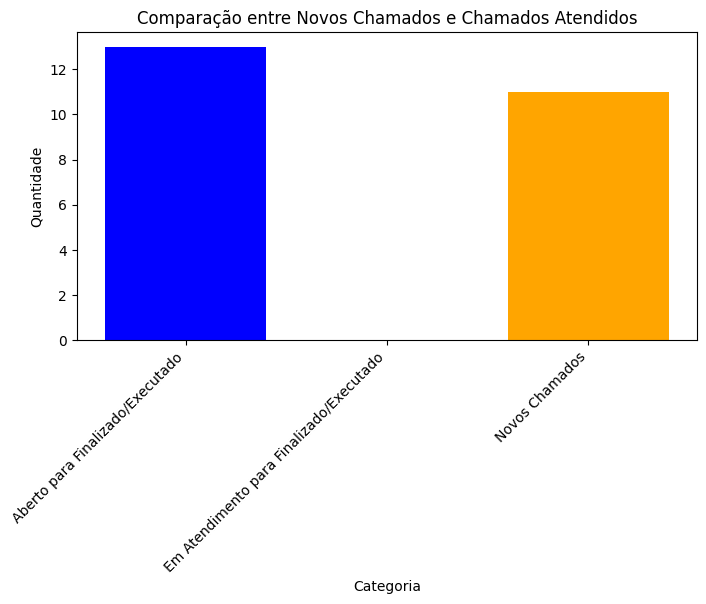

In [34]:
def calcular_transicoes(planilha1, planilha2):
    transicoes = {
        'Aberto para Finalizado/Executado': 0,
        'Em Atendimento para Finalizado/Executado': 0,
        'Novos Chamados': len(planilha2) - len(planilha1)
    }

    # Mapear status da planilha1
    status_planilha1 = dict(zip(planilha1['#'], planilha1['Status']))

    # Iterar sobre os chamados da segunda planilha e comparar com a primeira
    for chamado, status in zip(planilha2['#'], planilha2['Status']):
        if chamado in status_planilha1:
            status_anterior = status_planilha1[chamado]
            if status_anterior == "Aberto" and (status == "Executado" or status == "Finalizado"):
                transicoes['Aberto para Finalizado/Executado'] += 1
            elif status_anterior == " Em atendimento" and (status == "Executado" or status == "Finalizado"):
                transicoes['Em Atendimento para Finalizado/Executado'] += 1

    return transicoes

# Calcular as transições
quantidades_transicoes = calcular_transicoes(planilha1, planilha2)

# Criar um gráfico de barras para mostrar a comparação
categorias = list(quantidades_transicoes.keys())
valores = list(quantidades_transicoes.values())

plt.figure(figsize=(8, 4))
plt.bar(categorias, valores, color=['blue', 'green', 'orange'])
plt.title('Comparação entre Novos Chamados e Chamados Atendidos')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
# Rotacionar os rótulos do eixo x em 45 graus para melhorar a legenda
plt.xticks(rotation=45, ha='right')

plt.show()

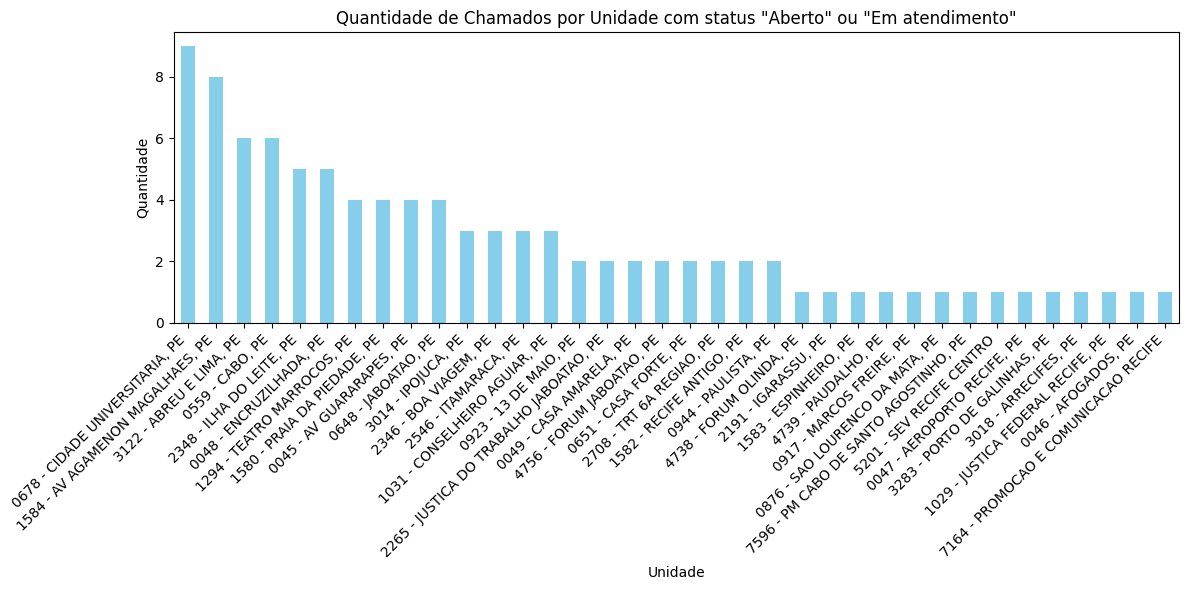

In [35]:
import matplotlib.pyplot as plt

# Filtrar os dados para incluir apenas as linhas com status "Aberto" ou "Em atendimento"
filt_planilha2 = planilha2[(planilha2['Status'] == 'Aberto') | (planilha2['Status'] == 'Em atendimento')]

# Contar o número de ocorrências de cada unidade
contagem_unidades = filt_planilha2['Unidade'].value_counts()

# Verificar se há dados para plotagem
if not contagem_unidades.empty:
    # Plotar o gráfico de barras
    plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura
    contagem_unidades.plot(kind='bar', color='skyblue')
    plt.xlabel('Unidade')
    plt.ylabel('Quantidade')
    plt.title('Quantidade de Chamados por Unidade com status "Aberto" ou "Em atendimento"')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x em 45 graus
    plt.tight_layout()
    plt.show()
else:
    print("Não há dados para plotagem.")


# RELAÇÃO DE CHAMADOS POR ITENS ABERTOS E EM ATENDIMENTO

<ipython-input-36-974852f7b309>:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

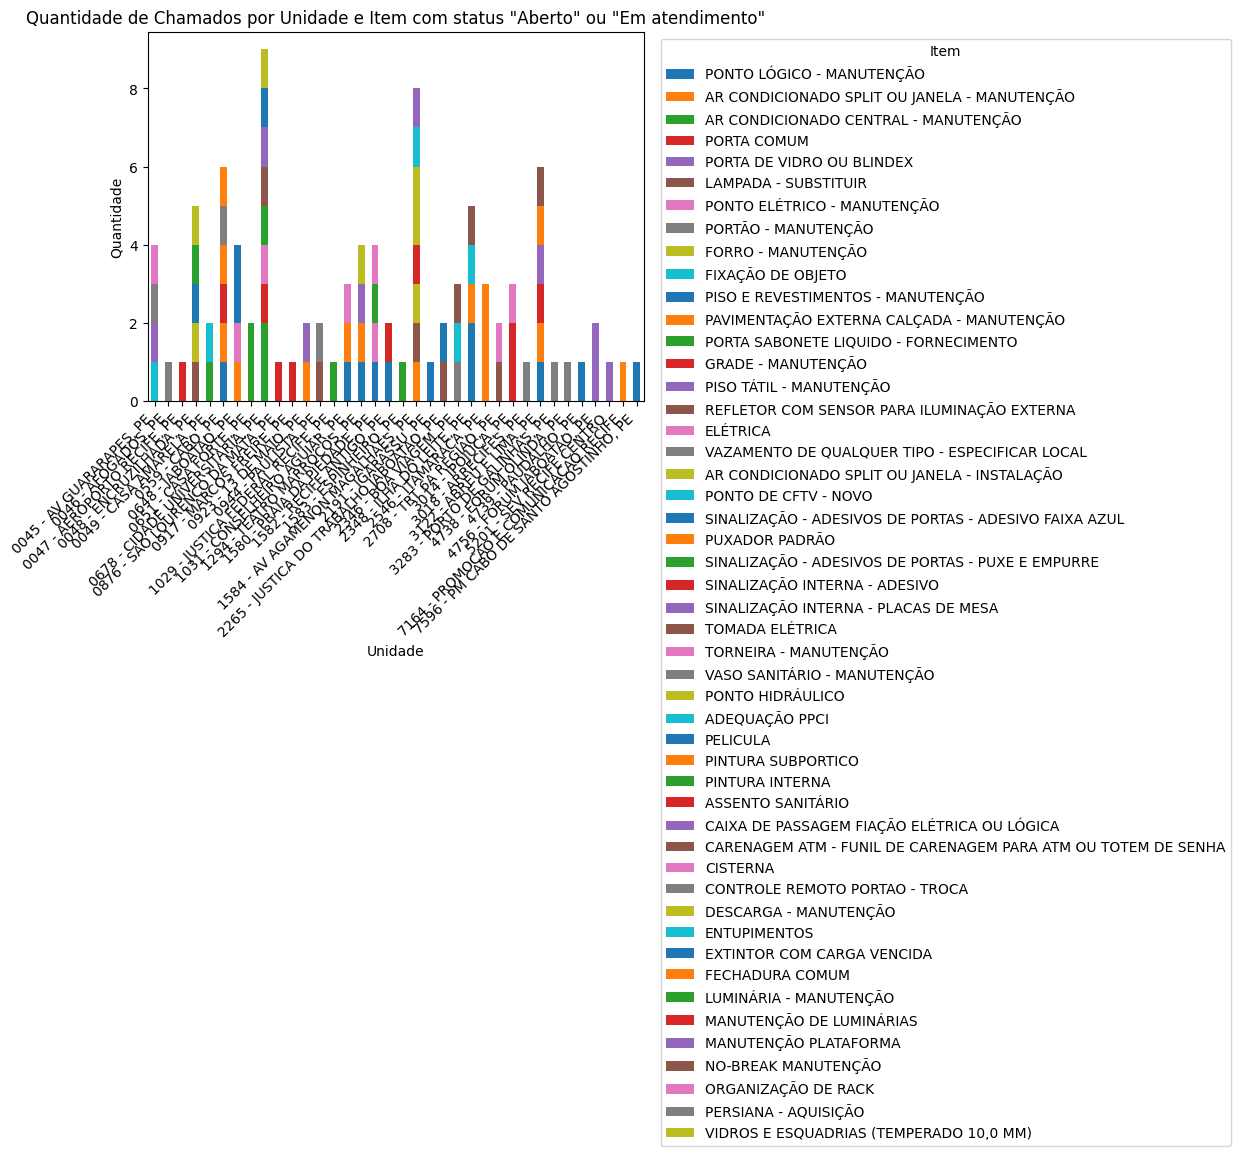

In [36]:
import matplotlib.pyplot as plt

# Filtrar os dados para incluir apenas as linhas com status "Aberto" ou "Em atendimento"
filt_planilha2 = planilha2[(planilha2['Status'] == 'Aberto') | (planilha2['Status'] == 'Em atendimento')]

# Criar uma tabela dinâmica para contar o número de ocorrências de cada Item por Unidade
pivot_table = filt_planilha2.pivot_table(index='Unidade', columns='Item', aggfunc='size', fill_value=0)

# Verificar se há dados para plotagem
if not pivot_table.empty:
    # Ordenar as colunas pela quantidade total de chamados
    pivot_table = pivot_table[pivot_table.sum().sort_values(ascending=False).index]

    # Plotar o gráfico de barras empilhadas
    plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura
    pivot_table.plot(kind='bar', stacked=True)
    plt.xlabel('Unidade')
    plt.ylabel('Quantidade')
    plt.title('Quantidade de Chamados por Unidade e Item com status "Aberto" ou "Em atendimento"')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x em 45 graus
    plt.legend(title='Item', bbox_to_anchor=(1.02, 1), loc='upper left')  # Mover a legenda para fora do gráfico
    plt.tight_layout()
    plt.show()
else:
    print("Não há dados para plotagem.")


#FILTRO RESUMO QUANTIDADE DE CHAMADOS COM MAIS DIVERSIFICAÇÃO DE ITENS , 15 UNIDADE COM MAIS CHAMADOS DIVERSIFICADOS.

<ipython-input-37-024e58854f0a>:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

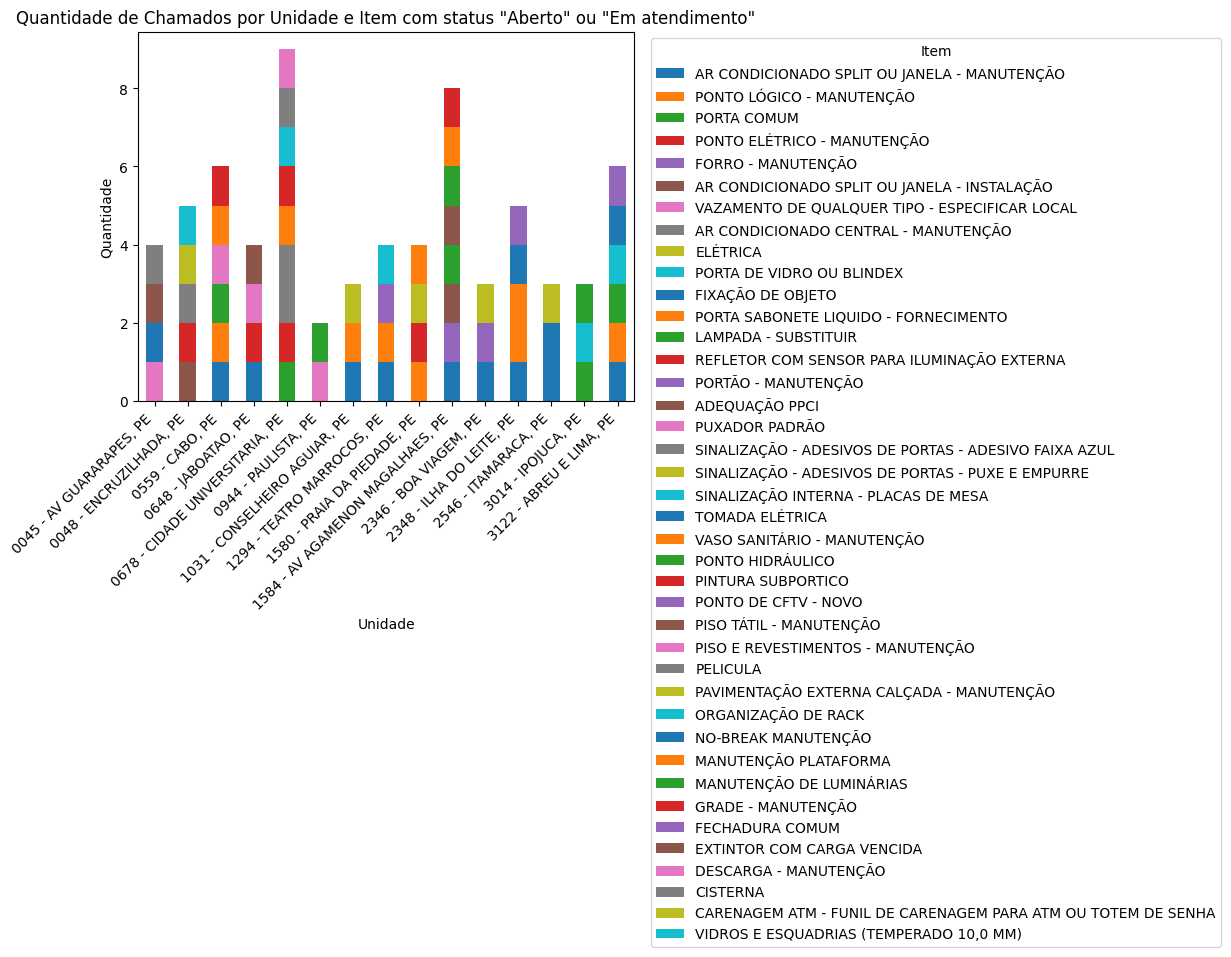

In [37]:
import matplotlib.pyplot as plt

# Filtrar os dados para incluir apenas as linhas com status "Aberto" ou "Em atendimento"
filt_planilha2 = planilha2[(planilha2['Status'] == 'Aberto') | (planilha2['Status'] == 'Em atendimento')]

# Calcular o total de chamados por agência
total_por_agencia = filt_planilha2.groupby('Unidade').size().sort_values(ascending=False)

# Selecionar as 15 agências com mais chamados
top_15_agencias = total_por_agencia.head(15)

# Filtrar o DataFrame original para incluir apenas as 15 agências com mais chamados
filt_planilha2 = filt_planilha2[filt_planilha2['Unidade'].isin(top_15_agencias.index)]

# Criar uma tabela dinâmica para contar o número de ocorrências de cada Item por Unidade
pivot_table = filt_planilha2.pivot_table(index='Unidade', columns='Item', aggfunc='size', fill_value=0)

# Verificar se há dados para plotagem
if not pivot_table.empty:
    # Ordenar as colunas pela quantidade total de chamados
    pivot_table = pivot_table[pivot_table.sum().sort_values(ascending=False).index]

    # Plotar o gráfico de barras empilhadas
    plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura
    pivot_table.plot(kind='bar', stacked=True)
    plt.xlabel('Unidade')
    plt.ylabel('Quantidade')
    plt.title('Quantidade de Chamados por Unidade e Item com status "Aberto" ou "Em atendimento"')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x em 45 graus
    plt.legend(title='Item', bbox_to_anchor=(1.02, 1), loc='upper left')  # Mover a legenda para fora do gráfico
    plt.tight_layout()
    plt.show()
else:
    print("Não há dados para plotagem.")


O arquivo CSV foi salvo em: /content/drive/My Drive/worck/EQS ENGENHARIA/LOG CAIXA/quantidade_chamados_por_unidade.csv


<ipython-input-38-970ff1e84609>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

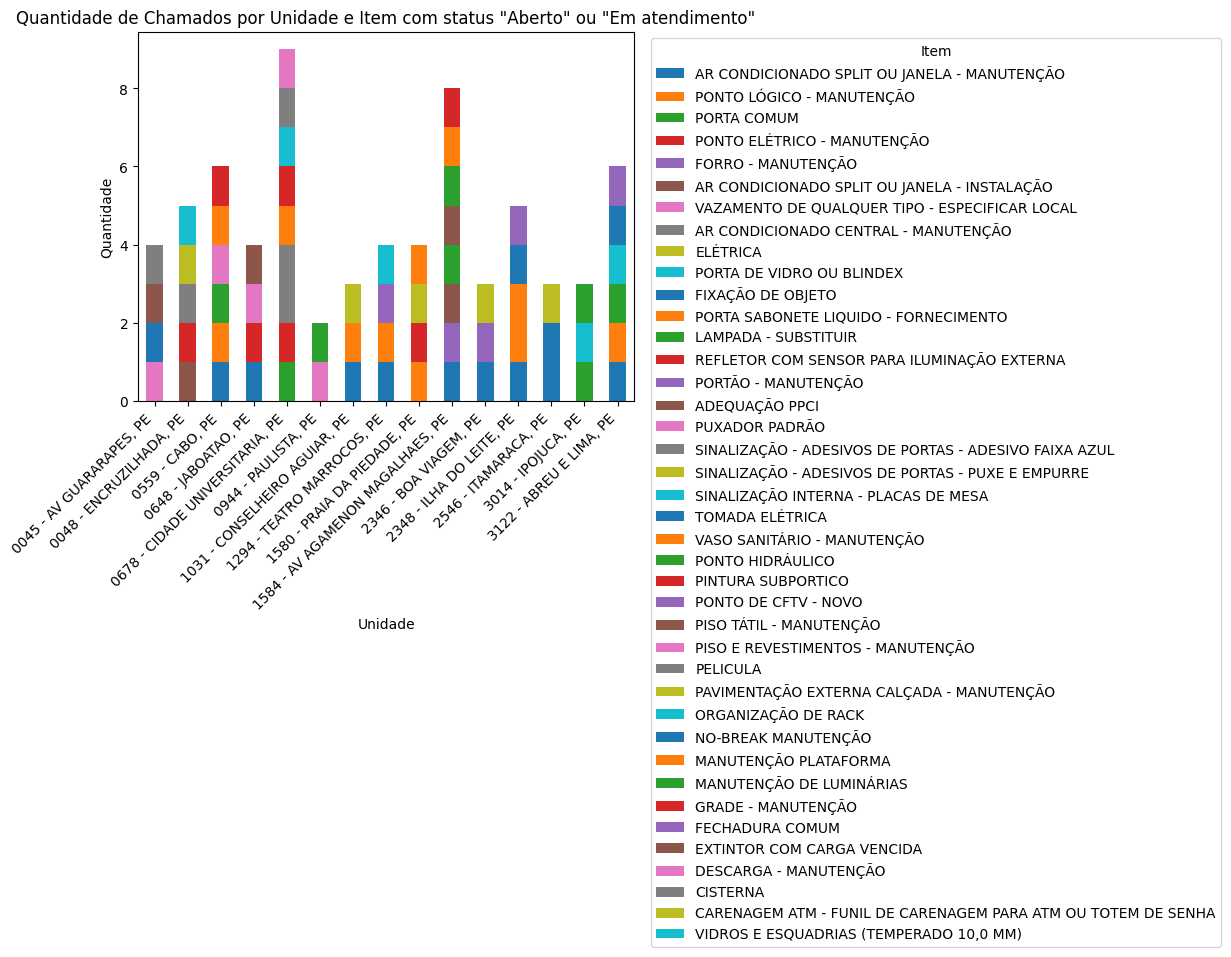

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Filtrar os dados para incluir apenas as linhas com status "Aberto" ou "Em atendimento"
filt_planilha2 = planilha2[(planilha2['Status'] == 'Aberto') | (planilha2['Status'] == 'Em atendimento')]

# Calcular o total de chamados por agência
total_por_agencia = filt_planilha2.groupby('Unidade').size().sort_values(ascending=False)

# Selecionar as 15 agências com mais chamados
top_15_agencias = total_por_agencia.head(15)

# Filtrar o DataFrame original para incluir apenas as 15 agências com mais chamados
filt_planilha2 = filt_planilha2[filt_planilha2['Unidade'].isin(top_15_agencias.index)]

# Criar uma tabela dinâmica para contar o número de ocorrências de cada Item por Unidade
pivot_table = filt_planilha2.pivot_table(index='Unidade', columns='Item', aggfunc='size', fill_value=0)

# Verificar se há dados para plotagem
if not pivot_table.empty:
    # Ordenar as colunas pela quantidade total de chamados
    pivot_table = pivot_table[pivot_table.sum().sort_values(ascending=False).index]

    # Plotar o gráfico de barras empilhadas
    plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura
    pivot_table.plot(kind='bar', stacked=True)
    plt.xlabel('Unidade')
    plt.ylabel('Quantidade')
    plt.title('Quantidade de Chamados por Unidade e Item com status "Aberto" ou "Em atendimento"')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x em 45 graus
    plt.legend(title='Item', bbox_to_anchor=(1.02, 1), loc='upper left')  # Mover a legenda para fora do gráfico
    plt.tight_layout()

    # Salvar a tabela dinâmica como um arquivo CSV no caminho especificado
    csv_file_path = '/content/drive/My Drive/worck/EQS ENGENHARIA/LOG CAIXA/quantidade_chamados_por_unidade.csv'
    pivot_table.to_csv(csv_file_path)

    # Exibir o caminho do diretório onde o arquivo foi salvo
    print(f"O arquivo CSV foi salvo em: {csv_file_path}")
else:
    print("Não há dados para plotagem.")

# Mostrar o gráfico
plt.show()
